In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import streamlit as st


In [2]:
# Data Collection (assuming you have a CSV file)
df = pd.read_csv('Customer-Churn-Records.csv')


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Data Cleaning and Preprocessing


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
# Drop columns wich is not required
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [7]:
# Check the shape of the dataframe (number of rows and columns)
print(df.shape)

(10000, 15)


In [8]:
# Inspect for missing values
print(df.isnull().sum())


CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [9]:
# Get summary statistics for numerical columns
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [10]:
# Check the data types of each column
print(df.dtypes)

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [11]:

# Label Encoding for Gender
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male -> 0, Female -> 1

# One-Hot Encoding for Geography and Card Type
df = pd.get_dummies(df, columns=['Geography', 'Card Type'], drop_first=True)

In [12]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,300,False,False,False,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,771,False,False,False,True,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,564,False,False,False,False,True
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,2,339,True,False,True,False,False


In [13]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [14]:
# check target class "Exited"
class_distribution= df['Exited'].value_counts()
class_distribution

Exited
0    7962
1    2038
Name: count, dtype: int64

In [15]:
#if classes are not evnly same distributed,perform resempling
class_0= df[df['Exited'] ==0]
class_1= df[df['Exited'] ==1]

In [16]:
from os import replace
from sklearn.utils import resample

In [17]:
class_1_upsampled= resample(class_1,replace=True,n_samples=len(class_0),random_state=0)

In [18]:
#combine both up with min to maj class
df=pd.concat([class_0,class_1_upsampled])

In [19]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,True,False,False
6,822,1,50,7,0.00,2,1,1,10062.80,0,0,2,206,False,False,False,False,True
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0,3,251,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8838,558,1,33,0,108477.49,1,1,1,109096.71,1,1,2,729,False,False,False,False,True
2654,532,1,44,3,148595.55,1,1,0,74838.64,1,1,1,955,False,False,False,True,False
1085,803,1,42,5,0.00,1,1,0,196466.83,1,1,1,534,False,False,True,False,False
279,714,1,46,1,0.00,1,1,0,152167.79,1,1,2,747,False,False,False,True,False


In [20]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [21]:
resampled_distribution=df['Exited'].value_counts()
resampled_distribution

Exited
0    7962
1    7962
Name: count, dtype: int64

Define features and target

In [22]:

# out target is "Exited" column bcs we are going to train model to predict custumer will "exited" or "not"

X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain',
        'Satisfaction Score', 'Point Earned', 'Geography_Germany', 
        'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM', 
        'Card Type_SILVER']]

y = df['Exited']


Split data into training and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [26]:
X_train

array([[ 1.96383482, -1.01240125,  1.00892991, ...,  1.74916897,
        -0.57375473, -0.57302956],
       [ 0.10996643, -1.01240125,  0.82082746, ..., -0.57170006,
         1.74290502, -0.57302956],
       [ 1.22025025,  0.98775066,  0.06841767, ..., -0.57170006,
        -0.57375473, -0.57302956],
       ...,
       [ 0.30350214, -1.01240125, -0.87209457, ...,  1.74916897,
        -0.57375473, -0.57302956],
       [-1.72352977,  0.98775066,  0.91487868, ..., -0.57170006,
        -0.57375473, -0.57302956],
       [-0.27710499,  0.98775066, -0.11968478, ..., -0.57170006,
        -0.57375473, -0.57302956]])

In [27]:
X_test

array([[ 0.44610741,  0.98775066,  0.44462256, ..., -0.57170006,
         1.74290502, -0.57302956],
       [ 0.19145515, -1.01240125, -0.40183845, ..., -0.57170006,
        -0.57375473,  1.74511067],
       [-1.19385309,  0.98775066, -0.40183845, ..., -0.57170006,
        -0.57375473,  1.74511067],
       ...,
       [ 0.32387433, -1.01240125, -1.62450436, ..., -0.57170006,
        -0.57375473,  1.74511067],
       [-0.12431364,  0.98775066, -1.06019702, ..., -0.57170006,
        -0.57375473,  1.74511067],
       [-1.0818061 ,  0.98775066, -0.77804335, ...,  1.74916897,
        -0.57375473, -0.57302956]])

Initialize the Ann model

In [68]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=17))
#model.add(Dropout(0.2)) 
model.add(Dense(11,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [69]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 3)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 11)             │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110 (440.00 B)

 Trainable params: 110 (440.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
#model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [71]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4979 - loss: 0.7621 - val_accuracy: 0.4904 - val_loss: 0.7297
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4958 - loss: 0.7219 - val_accuracy: 0.4857 - val_loss: 0.7017
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5010 - loss: 0.6974 - val_accuracy: 0.5319 - val_loss: 0.6834
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5617 - loss: 0.6791 - val_accuracy: 0.6217 - val_loss: 0.6697
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6385 - loss: 0.6672 - val_accuracy: 0.6769 - val_loss: 0.6556
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6838 - loss: 0.6519 - val_accuracy: 0.7121 - val_loss: 0.6396
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7202 - loss: 0.6339 - val_accuracy: 0.7444 - val_loss: 0.6207
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7531 - loss: 0.6121 - val_accuracy: 0.

In [72]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions (if you need them)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.1583
Test Accuracy: 98.24%
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy Score: 98.24%


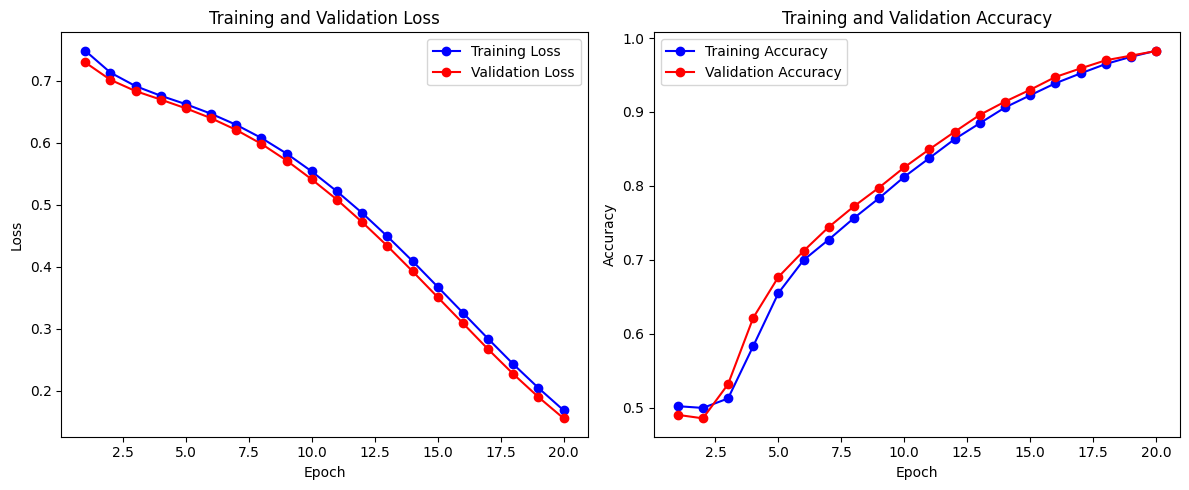

In [74]:
# Extracting metrics
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

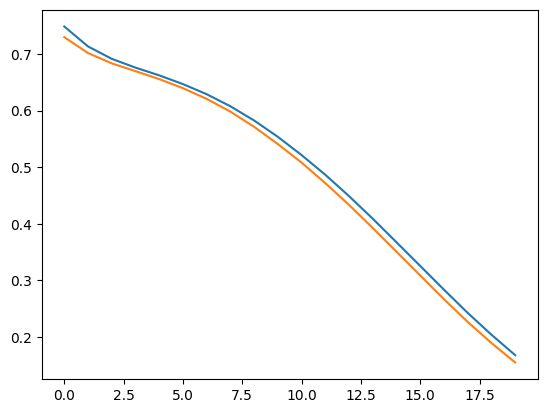

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


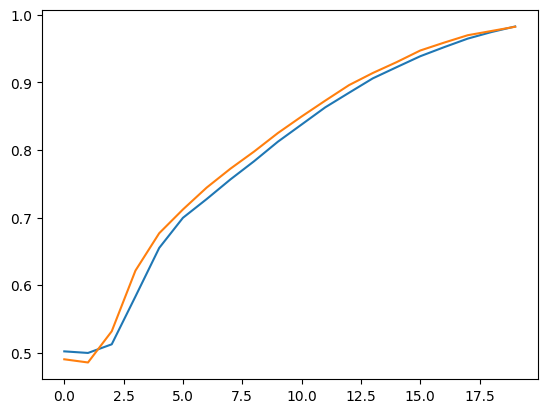

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [77]:
# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1577   43]
 [  13 1552]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1620
           1       0.97      0.99      0.98      1565

    accuracy                           0.98      3185
   macro avg       0.98      0.98      0.98      3185
weighted avg       0.98      0.98      0.98      3185



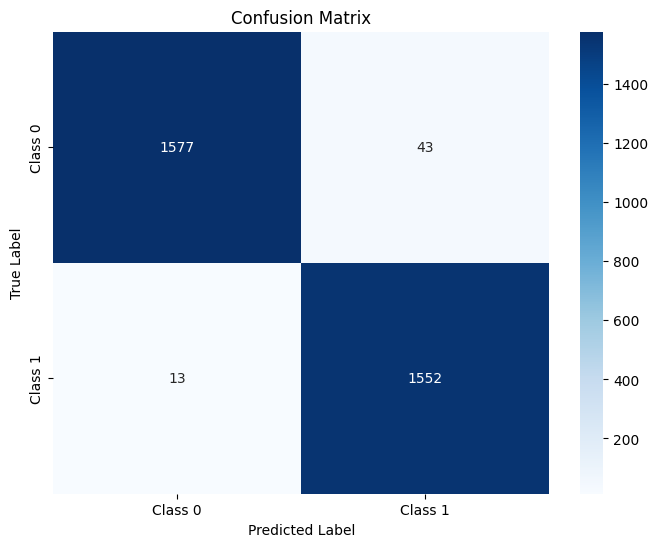

In [78]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [79]:
model.save('my_model.h5')

In [168]:
# Input layer and first hidden layer with dropout
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Dropout rate of 50%

# Additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))  # Apply Dropout again

# model.add(Dense(units=32, activation='relu'))
# model.add(Dropout(0.6))

model.add(Dense(units=16, activation='relu'))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))


c:\Users\irfan\miniconda3\envs\nlpenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [170]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8236 - loss: 0.4899 - val_accuracy: 0.9969 - val_loss: 0.0619
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8665 - loss: 0.2988 - val_accuracy: 0.9969 - val_loss: 0.0473
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8671 - loss: 0.2777 - val_accuracy: 0.9969 - val_loss: 0.0314
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8680 - loss: 0.2633 - val_accuracy: 0.9969 - val_loss: 0.0246
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.2633 - val_accuracy: 0.9969 - val_loss: 0.0213


In [171]:


# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions (if you need them)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9970 - loss: 0.0208
Test Accuracy: 99.69%
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy Score: 99.69%


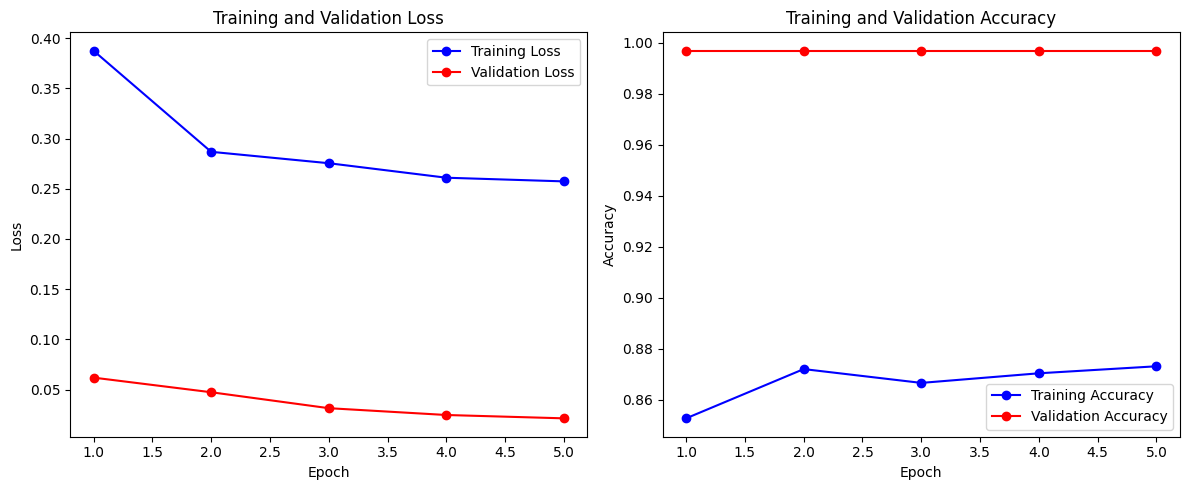

In [172]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Example:
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Extracting metrics
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [173]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9970 - loss: 0.0208
Test Accuracy: 99.69%


In [174]:
# Predictions (if you need them)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy Score: 99.69%


In [175]:
# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1615    5]
 [   5 1560]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00      1565

    accuracy                           1.00      3185
   macro avg       1.00      1.00      1.00      3185
weighted avg       1.00      1.00      1.00      3185



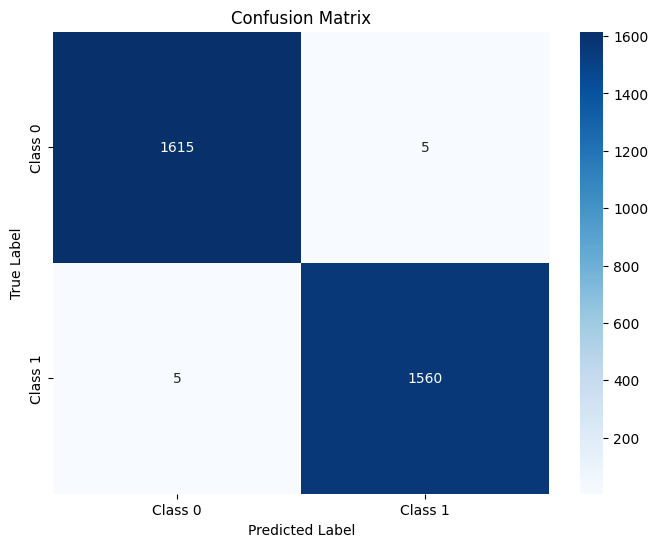

In [176]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [135]:
daga

NameError: name 'daga' is not defined

machin learning

Normalize or standardize the numerical features

 Model Building

In [28]:

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model.fit(X_train, y_train)

Make predictions

In [31]:
y_pred = model.predict(X_test)


Model Evaluation

In [ ]:

print(confusion_matrix(y_test, y_pred))


In [ ]:
print(classification_report(y_test, y_pred))

In [34]:
import pickle

# Save the model
with open('bank_costumers_churn_model.pkl', 'wb') as file:
    pickle.dump(model, file)